## Explatory Data Analysis and Cleaning

### Contents:
- [Train Data Import](#Train-Data-Import)
- [General Mosquito Species Distribution](#General-Mosquito-Species-Distribution)
- [Distributions in Traps](#Distributions-in-Traps)
- [Visualising Trap Locations](#Visualising-Trap-Locations)
- [Distribution of Mosquito species by year](#Distribution-of-Mosquito-species-by-year)
- [Distribution of Mosquito species in each year](#Distribution-of-Mosquito-species-in-each-year)
- [Comparing Weather across the Years](#Comparing-Weather-across-the-Years)

In [1]:
#*All libraries used should be added here*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('display.max_columns', 30)

### Train Data Import

In [2]:
trainDf = pd.read_csv('trainSprayCombinedWeather.csv')

In [3]:
trainDf.head()

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Most_Recent_Spray,Recently_Sprayed,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Weather,Day_of_Month,Month,Year,Day_of_Week
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.955,-87.801,9,1,0,3650.0,0,88,60,74,58,65.0,0,9,BR HZ,0.0,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
1,2007-05-29,CULEX RESTUANS,T002,41.955,-87.801,9,1,0,3650.0,0,88,60,74,58,65.0,0,9,BR HZ,0.0,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
2,2007-05-29,CULEX RESTUANS,T007,41.995,-87.769,9,1,0,3650.0,0,88,60,74,58,65.0,0,9,BR HZ,0.0,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974,-87.825,8,1,0,3650.0,0,88,60,74,58,65.0,0,9,BR HZ,0.0,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1
4,2007-05-29,CULEX RESTUANS,T015,41.974,-87.825,8,4,0,3650.0,0,88,60,74,58,65.0,0,9,BR HZ,0.0,29.39,30.11,5.8,18,6.5,coldAndWet,29,5,2007,1


In [4]:
trainDf['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

As mentioned earlier , this dataset is severely imbalanced.
There are many more cases of negative results than positive results with regards to the  presence of West Nile virus. 
We will need to take action to address this imbalance prior to training a model. (Later)

##  General Mosquito Species Distribution

In [5]:
trainDf['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

There are 6 species found, but we can see the majority of mosquitoes are either pipiens or restuans
The 1st category is probably a trap with the combination of 2 different species caught in the same trap


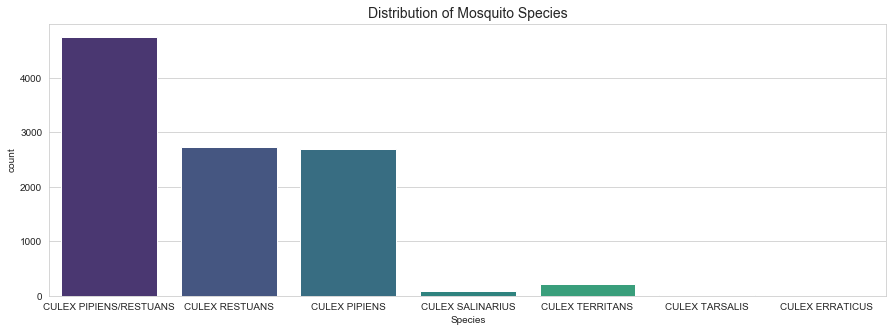

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x="Species", data=trainDf, palette="viridis")
plt.title("Distribution of Mosquito Species", fontsize=14)
plt.show()


The plot shows that the majority of the mosquitos caught were culex restuans and culex pipens

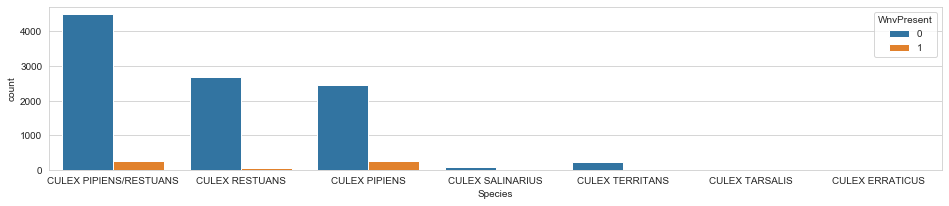

In [7]:
plt.subplots(figsize=(16,3))
sns.countplot('Species',data=trainDf,hue='WnvPresent',)

Culex Pipiens appears to be the main carrier of West Nile Virus as it is most commonly associated with the presence of west nile virus as seen in the plot above

## Distributions in Traps

In [8]:
trainDf.Trap.value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

Some traps are satellite traps. These traps are set up near an established trap to futher enhance surveillance efforts. They are denoted by Letters eg T220A.
We will combine the satellite to the main trap so as to get lesser unique values


In [9]:
def trap_data(x):
    x['Trap']=x['Trap'].apply(lambda x: x.replace('A','').replace('B','').replace('C',''))
    return x

In [10]:
trainDf=trap_data(trainDf)

In [11]:
trainDf['Trap'].value_counts()

T900    750
T115    542
T138    314
T002    185
T135    183
       ... 
T229      8
T238      7
T076      5
T237      3
T040      2
Name: Trap, Length: 134, dtype: int64

In [12]:
#now i want to find how many traps have more than 10 positive results of WNV

In [13]:
trap_coords=trainDf[['Trap','Latitude','Longitude']].drop_duplicates()
mosq_by_trap = trainDf[['Trap','NumMosquitos','WnvPresent']].groupby('Trap').agg('sum')
mosq_by_trap.sort_values(by='WnvPresent', ascending=False, inplace=True)
mosq_by_trap.reset_index(inplace=True)
top_traps =mosq_by_trap[mosq_by_trap['WnvPresent']>10]
top_traps=pd.merge(top_traps, trap_coords,  how='left', left_on=['Trap'], right_on = ['Trap'])
top_traps


,Trap,NumMosquitos,WnvPresent,Latitude,Longitude
0,T900,15386,66,41.975,-87.891
1,T115,21668,41,41.673,-87.600
2,T002,3710,18,41.955,-87.801
3,T138,9936,16,41.726,-87.585
4,T003,1346,14,41.964,-87.758
5,T011,1311,11,41.945,-87.833
6,T225,2014,11,41.743,-87.731
7,T128,3315,11,41.705,-87.566


Only 8 out of 134 traps have more than 10 positive results of West Nile Virus

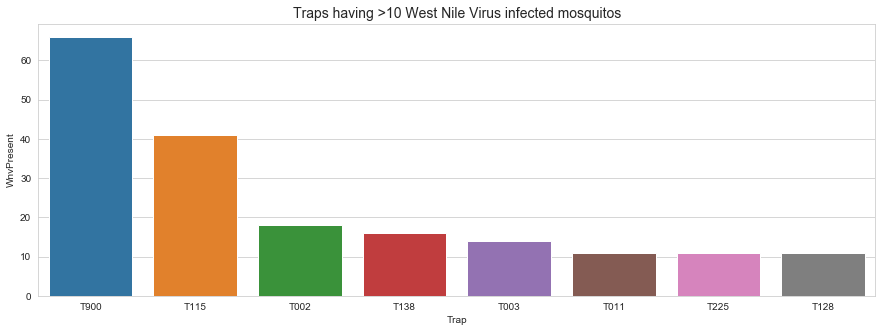

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=mosq_by_trap[mosq_by_trap['WnvPresent']>10], x='Trap', y='WnvPresent')#, hue='Date')
plt.title("Traps having >10 West Nile Virus infected mosquitos", fontsize=14)
plt.show()

In [15]:
species_counts = trainDf.groupby('Species').sum()['WnvPresent'].copy()

species_pct_wnv = trainDf.groupby('Species').sum()['WnvPresent']/trainDf.groupby('Species').count()['WnvPresent'].copy()

[Text(0.5, 1.0, '% of Trapped Mosquitos with West Nile virus')]

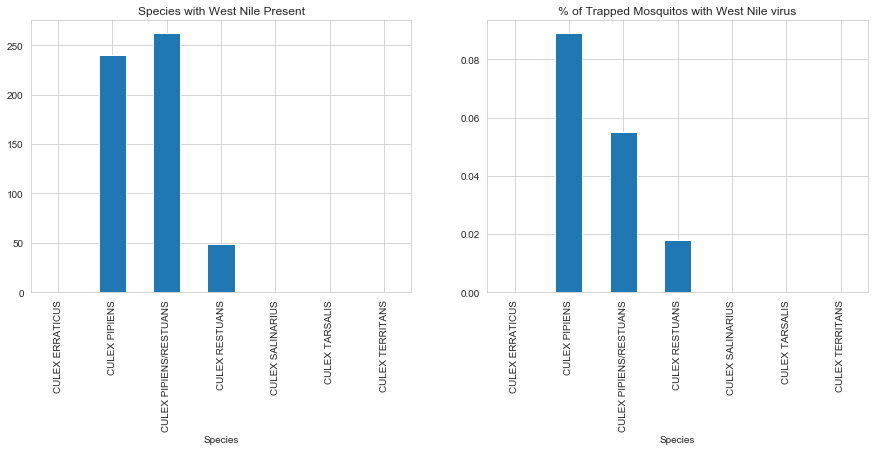

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

species_counts.plot(kind='bar', ax=ax1)

# Add labels to the plot
ax1.set(title="Species with West Nile Present")

species_pct_wnv.plot(kind='bar', ax=ax2)
ax2.set(title="% of Trapped Mosquitos with West Nile virus") # xlabel='Standardized Salaries', ylabel='Winning Percentage')

## Visualising Trap Locations

In [17]:
BBox = ((trainDf.Longitude.min(),   trainDf.Longitude.max(),      
         trainDf.Latitude.min(), trainDf.Latitude.max()))
BBox

(-87.931, -87.53200000000001, 41.645, 42.016999999999996)

In [18]:
mapdata = np.loadtxt("./mapdata_copyright_openstreetmap_contributors.txt")

In [19]:
locations=trainDf[trainDf['Year']==2011][['Latitude','Longitude']]
locations.head()

,Latitude,Longitude
6060,41.896,-87.655
6061,41.721,-87.666
6062,42.017,-87.688
6063,41.987,-87.690
6064,41.801,-87.763


In [20]:
df_weather_stations=pd.DataFrame({
    'Station':[1,2],
    'Latitude':[41.995, 41.786],
    'Longitude':[-87.933, -87.752]
})
df_weather_stations

,Station,Latitude,Longitude
0,1,41.995,-87.933
1,2,41.786,-87.752


In [21]:
spray = pd.read_csv('sprayDf.csv')

In [22]:
def plot_map_for_yr(X, yr):
    df_yr = X[X['Year']==yr]
    aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
    lon_lat_box = (-88, -87.5, 41.6, 42.1)

    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)

    locations = df_yr[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='x', c='black')

    locations_wnv = df_yr[df_yr['WnvPresent']==1][['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations_wnv[:,0], locations_wnv[:,1], marker='o', c='red')

    locations_weather = df_weather_stations[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations_weather[:,0], locations_weather[:,1], marker="D", c='green')
    
    if yr==2011:
        #include spray location
        df_2011 = trainDf[trainDf['Year']==2011]
        df_spray__2011 =spray[(spray['Date']==2011)]
        locations_spray = df_spray__2011[['Longitude', 'Latitude']].drop_duplicates().values
        plt.scatter(locations_spray[:,0], locations_spray[:,1], marker="4", c='yellow')
        
    # plot our top ten most WNV-associated traps
    
    locations_top_traps = top_traps[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations_top_traps[:,0], locations_top_traps[:,1], marker="D", c='blue')
    
    plt.title(yr)

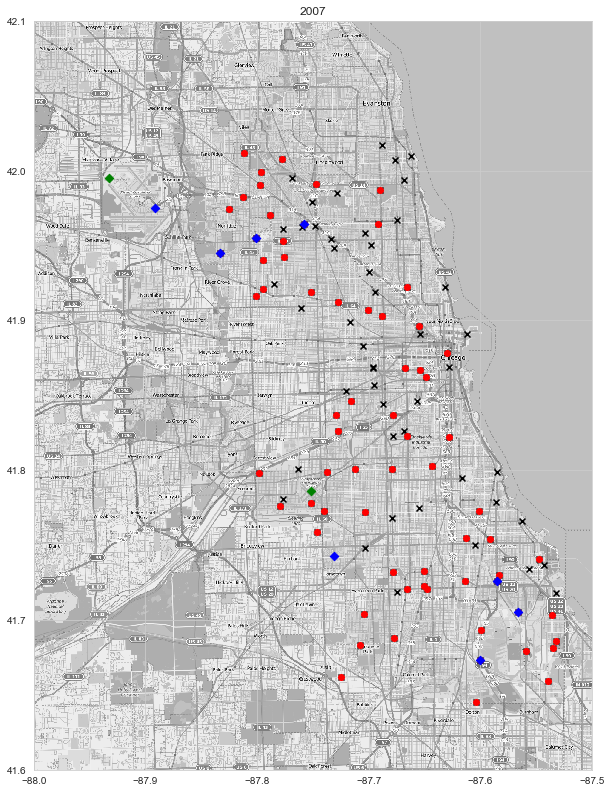

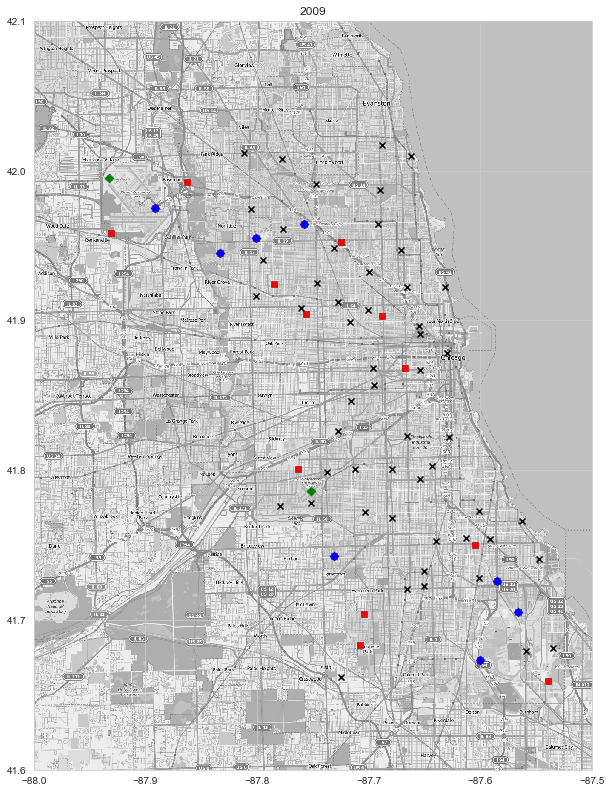

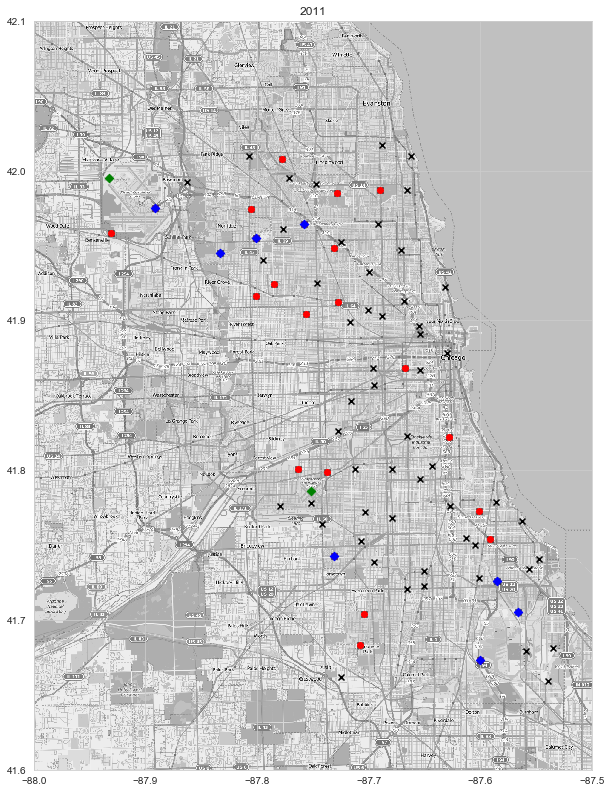

In [23]:
for ayear in [2007, 2009, 2011]:
    plot_map_for_yr(trainDf, ayear)

<b>LEGEND</b>

<br>red square: west nile virus detected
<br>black X: trap location
<br>blue circle: "Top Trap" for west nile virus association
<br>green circle: weather station
    


Observations:
    
We can generally see the that the traps where the top counts of WNV present (blue circle) are clustered nearby to each other.

## Check correlations of columns to WNEpresent particularly from weather data columns and spray data columns

In [24]:
trainDf.corrwith(trainDf['WnvPresent'])

Latitude             0.028708
Longitude           -0.060389
AddressAccuracy      0.008064
NumMosquitos         0.196820
WnvPresent           1.000000
Most_Recent_Spray   -0.023134
Recently_Sprayed     0.015186
Tmax                 0.047130
Tmin                 0.065705
Tavg                 0.059897
DewPoint             0.082685
WetBulb              0.077539
Heat                -0.052818
Cool                 0.053347
PrecipTotal          0.028411
StnPressure         -0.004663
SeaLevel             0.010163
ResultSpeed         -0.043413
ResultDir           -0.003530
AvgSpeed            -0.031043
Day_of_Month         0.008245
Month                0.100143
Year                 0.050865
Day_of_Week          0.014968
dtype: float64

## Distribution of Mosquito species by year

In [25]:
mosq_by_year = trainDf[['Year','Species','NumMosquitos','WnvPresent']].groupby(['Year','Species']).agg('sum')
mosq_by_year.reset_index(inplace=True)
mosq_by_year


,Year,Species,NumMosquitos,WnvPresent
0,2007,CULEX PIPIENS,35871,147
1,2007,CULEX PIPIENS/RESTUANS,20565,83
2,2007,CULEX RESTUANS,1847,6
3,2007,CULEX SALINARIUS,61,0
4,2007,CULEX TERRITANS,344,0
5,2009,CULEX PIPIENS,867,0
6,2009,CULEX PIPIENS/RESTUANS,15531,13
7,2009,CULEX RESTUANS,4657,6
8,2009,CULEX SALINARIUS,26,0
9,2009,CULEX TARSALIS,2,0


[Text(0.5, 1.0, 'Presences of West Nile Virus per Species')]

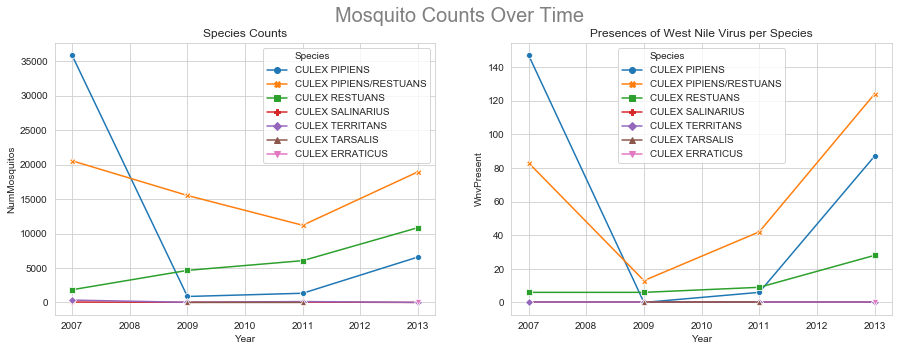

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
fig.suptitle('Mosquito Counts Over Time', ha='center',color = 'grey',fontsize=20,va='top',) 

sns.lineplot(ax=ax1,data=mosq_by_year,x='Year',y='NumMosquitos',hue='Species', style='Species', markers=True,dashes=False)
ax1.set(title="Species Counts")

sns.lineplot(ax=ax2,data=mosq_by_year,x='Year',y='WnvPresent',hue='Species', style='Species', markers=True,dashes=False)
ax2.set(title="Presences of West Nile Virus per Species")

We can see from the above plots that:
    
For mosquito numbers:
<br>-Culex Pipiens numbers dropped off rapidly in 2009 and 2011, but started to rise again in 2011 to 2013
<br>-Culex restuans has a steady increase in numbers over time
<br>-The general trend is that all species except Terraritans,Tarsalis are increasing from 2011 to 2013.



For Positive West Nile Counts:
<br>-numbers have been increasing from 2009 onwards.
<br>-in 2013,the WNV is observed in Culex Pipiens, Culex Pipiens/Restuans, Culex Restuans

## Distribution of Mosquito species in each year

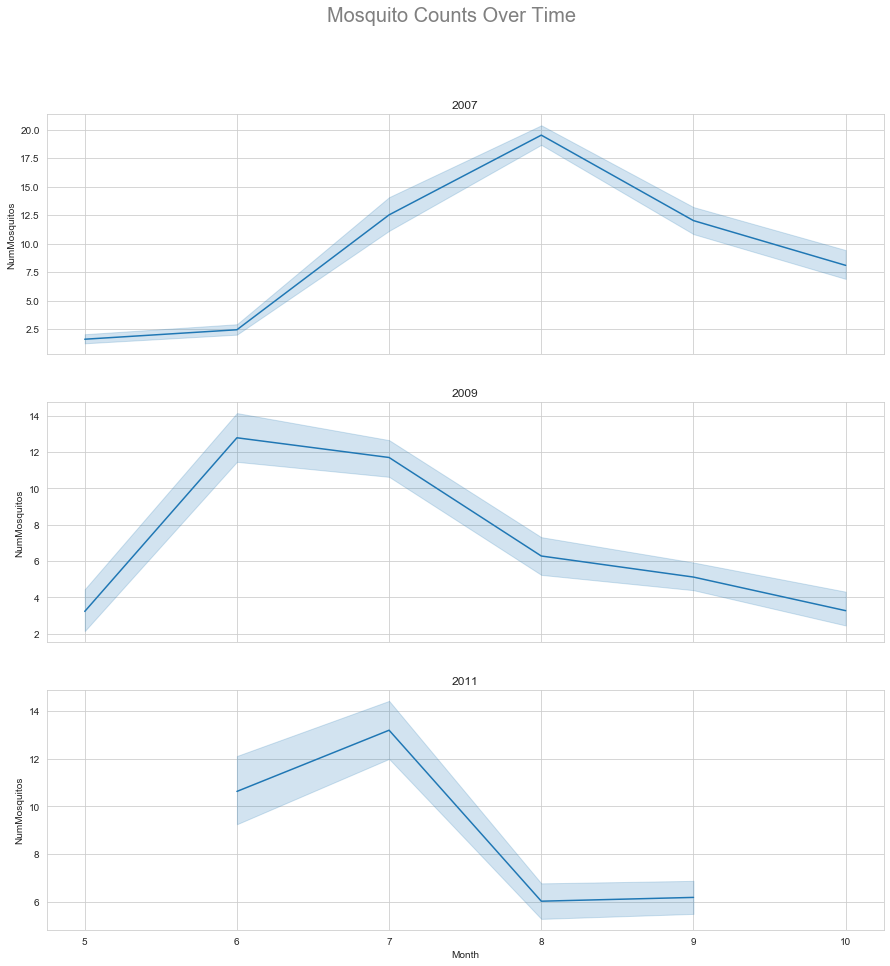

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15),sharex=True)
fig.suptitle('Mosquito Counts Over Time', ha='center',color = 'grey',fontsize=20,va='top',) 
cnt=0
for ayear in [2007, 2009, 2011]:
    sns.lineplot(ax=ax[cnt], data=trainDf[(trainDf['Year']==ayear)],x='Month',y='NumMosquitos')#,hue='Species')
    ax[cnt].set(title=ayear)
    cnt = cnt+1

-in 2007, mosquito counts peaked in August, 
<br>-in 2009, they peaked much earlier in June
<br>-2011 also showed a peak in July
<br>-Somehow over the years, the peak period tend to shift earlier, is there a reason for this ??

## Comparing Weather across the Years

In [28]:
def plot_time_charts(X, x_col, y_col,title):
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15), sharey=True)

    fig.suptitle(title, ha='center',color = 'grey',fontsize=20,va='top',) 
    cnt=0
    for ayear in [2007, 2009, 2011]:
        sns.lineplot(ax=ax[cnt], data=X[(X['Year']==ayear)],x=x_col,y=y_col)
        ax[cnt].set(title=ayear)
        cnt = cnt+1

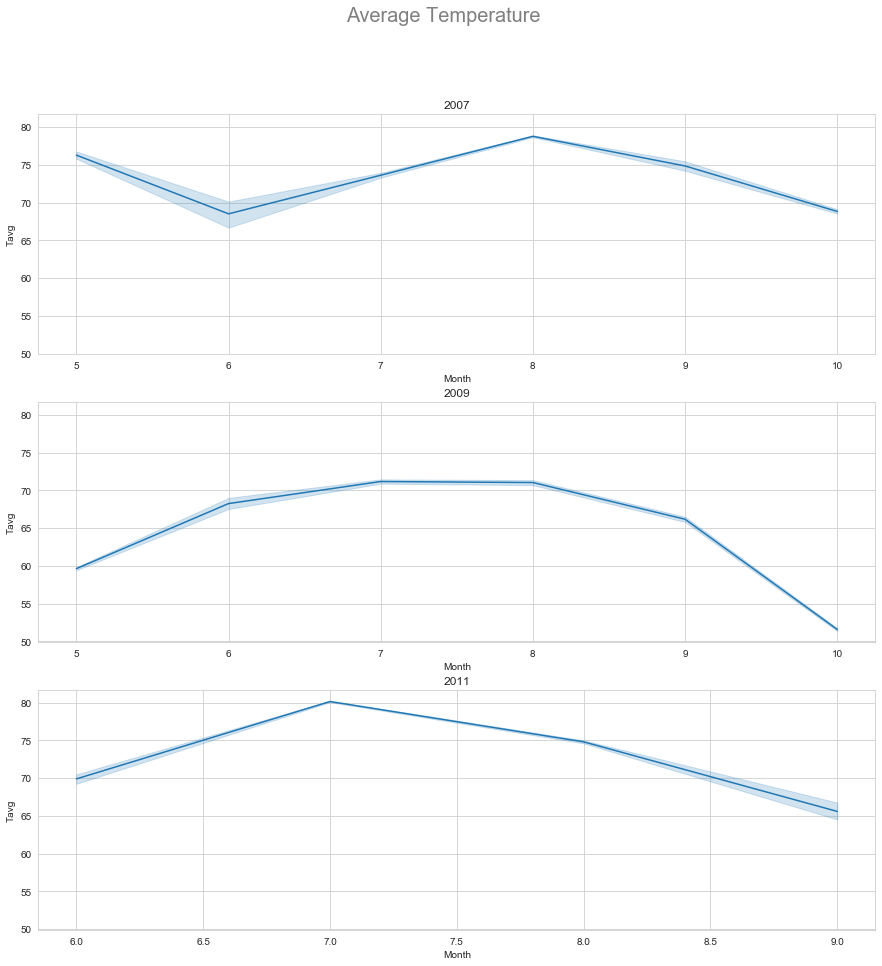

In [29]:
plot_time_charts(trainDf, 'Month', 'Tavg','Average Temperature')

From the average temperature recorded throughout each year:

<br>The peak temperature in 2007 was recorded in Auguest, while the peak <br>temperatures in 2009 and 2011 were recorded between june and july.

<br>This corresponded to the peak number of mosquitoes detected in the <br>respective years.

<br>This suggests that heat plays are part in the reproduction of mosquitoes

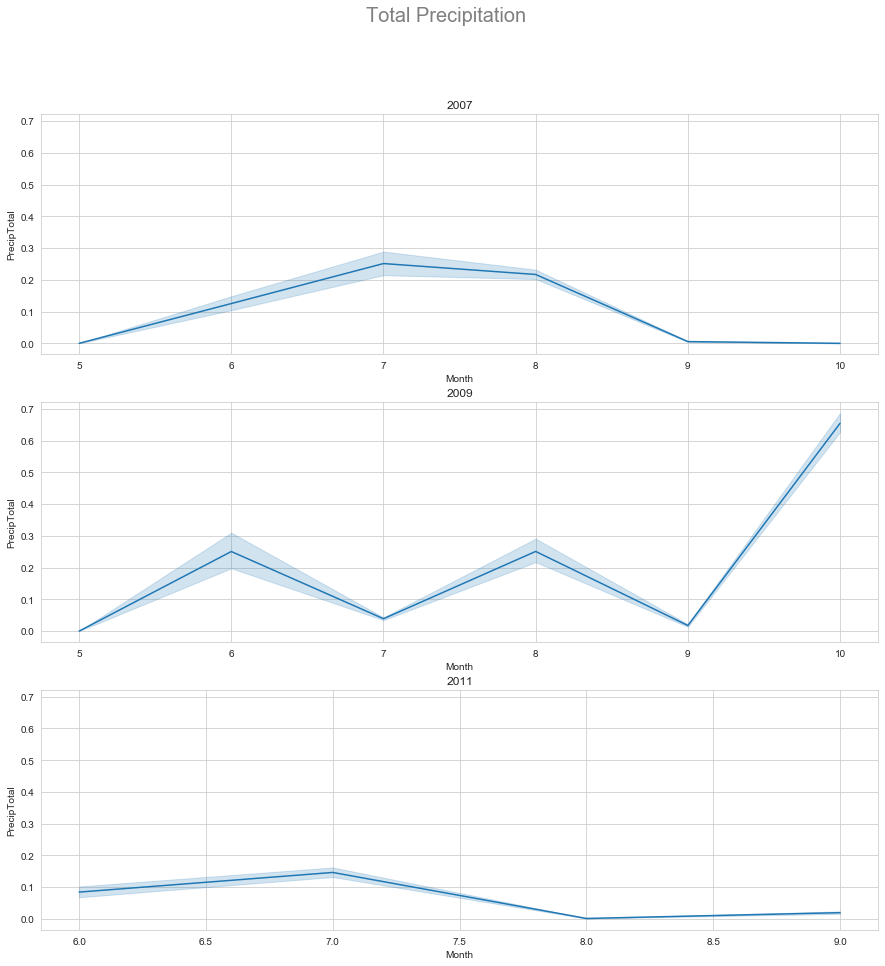

In [30]:
plot_time_charts(trainDf, 'Month', 'PrecipTotal','Total Precipitation')

The plot of precipitation does not really paint a clear picture.
<br>What it does that tell us that for all 3 years , precipation levels was low a the point of peak mosquito counts.

<br>This suggest mosquitos strive in dryer enviroments.

<br>Overall this in line with the data library that suggests that hot and dry conditions are ideal in mosquito breeding.